<a href="https://www.kaggle.com/code/manapoker1/house-prices-prediction-using-tfdf?scriptVersionId=131192087" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Libraries

In [1]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load the data

In [2]:
train_file_path = "../input/house-prices-advanced-regression-techniques/train.csv"
dataset_df = pd.read_csv(train_file_path)

Show the first rows to see how its the dataset

In [3]:
dataset_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


Inspect how many row and columns does it have

In [4]:
print(f"   Rows: {dataset_df.shape[0]}")
print(f"Columns: {dataset_df.shape[1]}")

   Rows: 1460
Columns: 81


Show the columns of the dataset

In [5]:
print([col for col in dataset_df.columns])

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

**SalesPrice** is the column to predict

In [6]:
dataset_df['SalePrice'].head(3)

0    208500
1    181500
2    223500
Name: SalePrice, dtype: int64

We can drop the column Id as it doesn't give us information

In [7]:
dataset_df = dataset_df.drop('Id', axis=1)

Inspect the __type of the features__

In [8]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## House Price Distribution

As the price is the target variable we want to predict. It would be interesting to know __how it is distributed__.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/tmp/ipykernel_20/1482814628.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


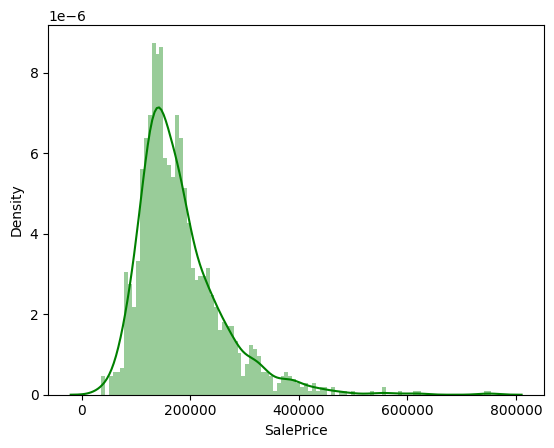

In [9]:
print(dataset_df['SalePrice'].describe())

sns.distplot(
    dataset_df['SalePrice'], 
    color='g', 
    bins=100
);

## Numerical data distribution

We will take a look at how the numerical features are distributed. To do this, let us first list all the types of data from our dataset and select only the numerical ones.

In [10]:
data_types = set(dataset_df.dtypes.tolist())
print(f"Types of data: {data_types}")

Types of data: {dtype('int64'), dtype('float64'), dtype('O')}


As we can see we have Strings, Integers, and Floats. We want to inspect the numerical variables apart of the cathegorical ones. 

## Select numerical features

In [11]:
df_num = dataset_df.select_dtypes(include=['float64', 'int64'])
# Show the first rows
df_num.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500


Now, let us plot the __distribution for each numerical feature__

array([[<AxesSubplot: title={'center': 'MSSubClass'}>,
        <AxesSubplot: title={'center': 'LotFrontage'}>,
        <AxesSubplot: title={'center': 'LotArea'}>,
        <AxesSubplot: title={'center': 'OverallQual'}>,
        <AxesSubplot: title={'center': 'OverallCond'}>,
        <AxesSubplot: title={'center': 'YearBuilt'}>],
       [<AxesSubplot: title={'center': 'YearRemodAdd'}>,
        <AxesSubplot: title={'center': 'MasVnrArea'}>,
        <AxesSubplot: title={'center': 'BsmtFinSF1'}>,
        <AxesSubplot: title={'center': 'BsmtFinSF2'}>,
        <AxesSubplot: title={'center': 'BsmtUnfSF'}>,
        <AxesSubplot: title={'center': 'TotalBsmtSF'}>],
       [<AxesSubplot: title={'center': '1stFlrSF'}>,
        <AxesSubplot: title={'center': '2ndFlrSF'}>,
        <AxesSubplot: title={'center': 'LowQualFinSF'}>,
        <AxesSubplot: title={'center': 'GrLivArea'}>,
        <AxesSubplot: title={'center': 'BsmtFullBath'}>,
        <AxesSubplot: title={'center': 'BsmtHalfBath'}>],
     

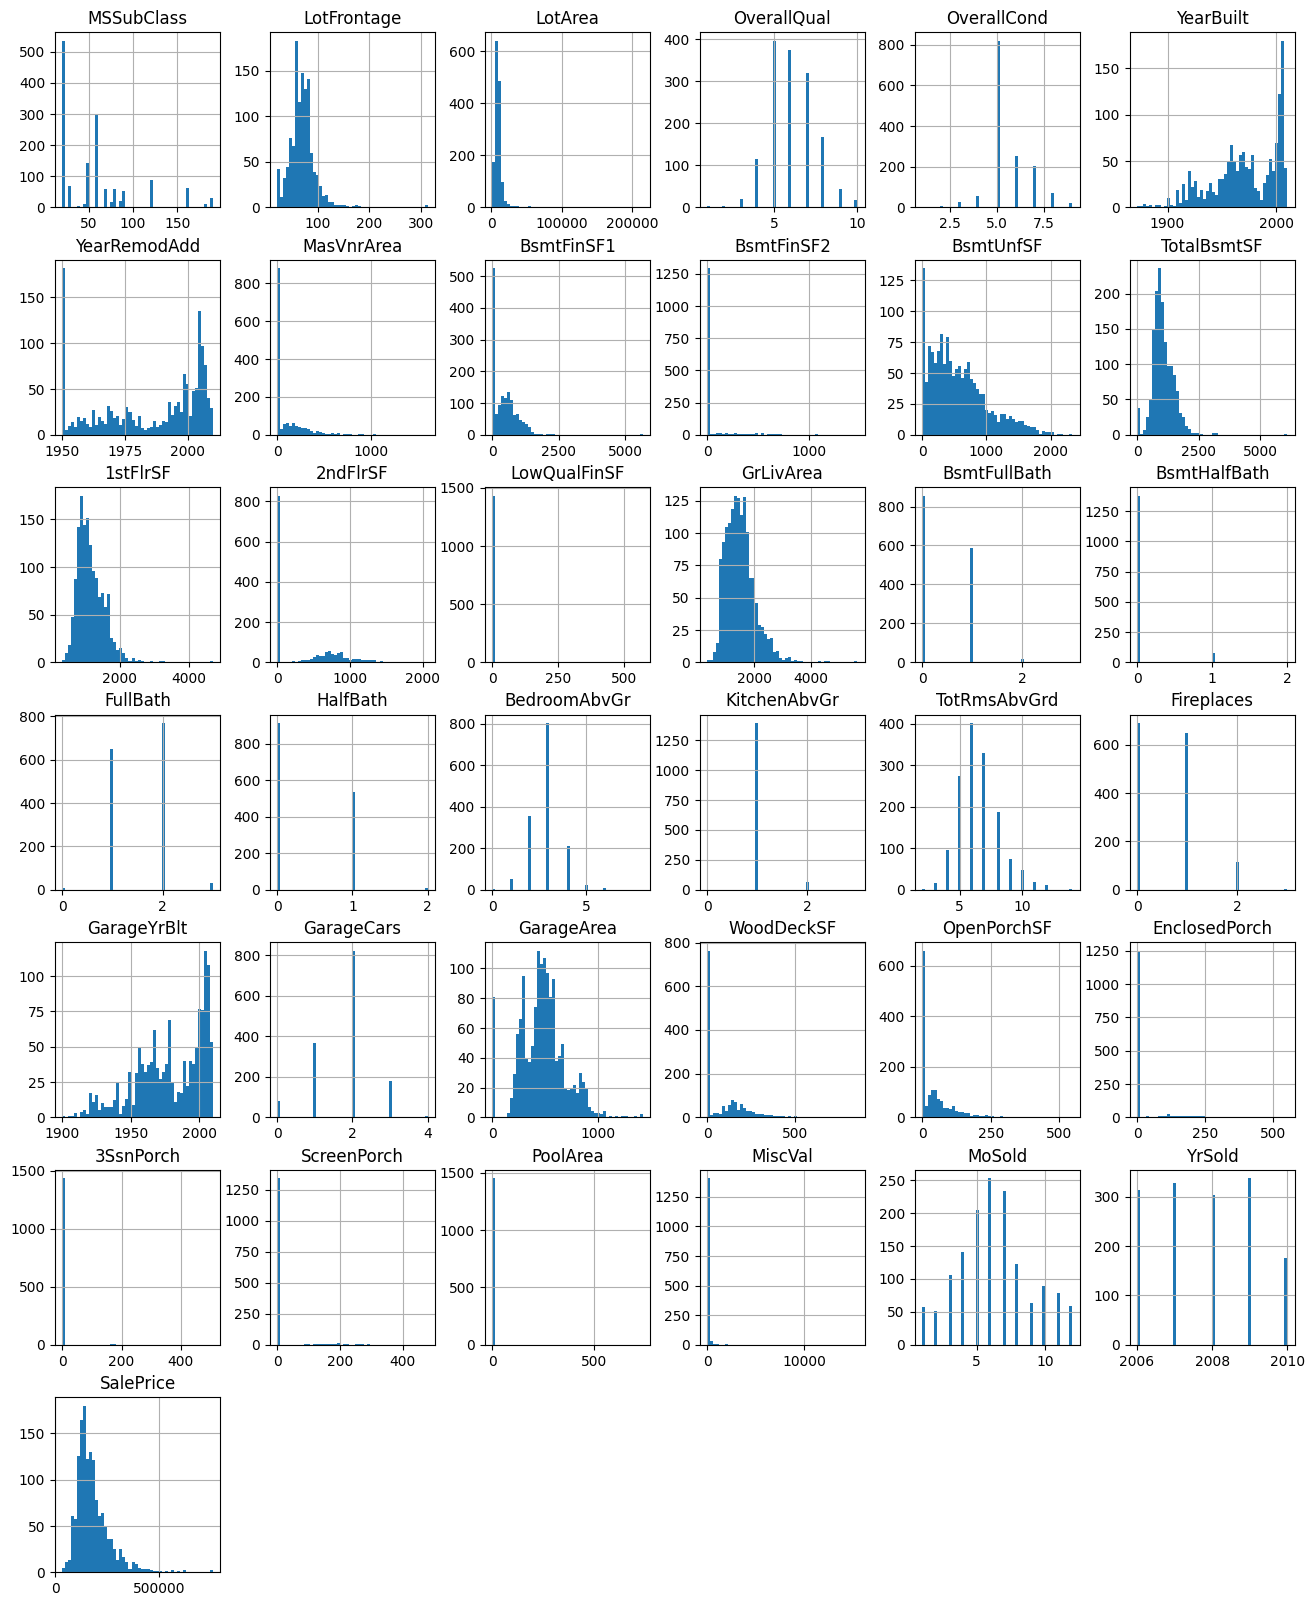

In [12]:
df_num.hist(
    figsize=(16,20),
    bins=50
)

## Prepare the dataset
This dataset contains a mix of numeric, categorical and missing features. 
TFDF (Tensor Flow Decision Forest) supports all these feature types natively, and no preprocessing is required. This is one advantage of tree-based models, making them a great entry point to Tensorflow and ML.

Now let's **split the dataset into training and testing datasets**.

In [13]:
def split_dataset(dataset, test_ratio=0.3):
    """
    Splits a given dataset into 2 parts. The size of the parts is given by
    the parameter "test_ratio"
    """
    
    # Select the indices of the data frame that will be for test
    test_indices = np.random.rand(len(dataset)) < test_ratio
    
    # Return 2 parts of the given dataset
    return dataset[~test_indices], dataset[test_indices]    

In [14]:
train_ds_pd, valid_ds_pd = split_dataset(dataset_df)
print(f"Examples in training: {train_ds_pd.shape[0]}")
print(f"Examples in testing: {valid_ds_pd.shape[0]}")

Examples in training: 1028
Examples in testing: 432


There is one more step required before we can train the model. We need to **convert the dataset from Pandas Dataframe (pd.DataFrame) to TensorFlow Dataset (tf.data.Dataset)**.

TensorFlow Dataset is a high performance data loading library which is helpful when training neural networks with accelerators like GPUs and TPUs.

By default the Random Forest Model is configured to train classification tasks. Since this is a regression problem, we will specify the type of the task (tfdf.keras.Task.REGRESSION) as parameter here

In [15]:
label = 'SalePrice'

# Convert the training dataset from Pandas Dataframe to Tensorflow Dataset
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, 
                                                 label=label, 
                                                 task = tfdf.keras.Task.REGRESSION)

# Convert the training dataset from Pandas Dataframe to Tensorflow Dataset
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, 
                                                 label=label, 
                                                 task = tfdf.keras.Task.REGRESSION)

## Select a model 

There are **several tree-based models** for you to choose from:
- RandomForestModel
- GradientBoostedTreesModel
- CartModel
- DistributedGradientBoostedTressModel


To start, we'll work with RandomForest. This is the most well-known of the Decision Forest training algorithms.

A **Random Forest is a collection of decision trees, each trained independently on a random subset of the training dataset (sampled with replacement)**. The algorithm is unique in that is **robust to overfitting** and **easy to use**.

We can list all available models in TensorFlow Decision Forests:

In [16]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

## Configure the models

TensorFlow Decision Forests provide good defaults for you (for example, the top ranking hyperparameters on our benchmarks, slightly modified to run in reasonable time). 
If you would like to configure the learning algorithm, you will find many options you can explore to get the highest possible accuracy. 
You can select a template and/or set parameters as follows:

In [17]:
rf = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1")
task = tfdf.keras.Task.REGRESSION

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpypjhgizp as temporary training directory


## Create a Random Forest
For this time, we will use the defaults to create the Random Forest Model while __specifying the task type as tfdf.Task.REGRESSION__

In [18]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)

# This is optional. It is used to include a list of eval metrics
rf.compile(metrics=["mse"]) 

Use /tmp/tmpcg8d3en4 as temporary training directory


## Train the model

We'll train the model using a one-liner.

In [19]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:08.443406. Found 1028 examples.
Training model...


[INFO 2023-05-27T08:32:24.534593842+00:00 kernel.cc:1214] Loading model from path /tmp/tmpcg8d3en4/model/ with prefix 3719f8bf0875484d


Model trained in 0:00:02.300601
Compiling model...


[INFO 2023-05-27T08:32:24.961310786+00:00 decision_forest.cc:661] Model loaded with 300 root(s), 97786 node(s), and 73 input feature(s).
[INFO 2023-05-27T08:32:24.961396198+00:00 abstract_model.cc:1311] Engine "RandomForestOptPred" built
[INFO 2023-05-27T08:32:24.961477293+00:00 kernel.cc:1046] Use fast generic engine


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


## Visualize the model
One **benefit of tree-based models is that you can easily visualize them**. The default number of trees used in the Random Forests is 300. We can select a tree to display below.

In [20]:
tfdf.model_plotter.plot_model_in_colab(rf,
                                      tree_idx=0, max_depth=3)

## Evaluate the model on the Out of bag (OOB) data and the validation dataset

Before training the dataset we have manually separated 30% of the dataset for validation named as "valid_ds".

We can also __use Out of bag (OOB) score to validate our RandomForestModel__. To train a Random Forest Model, __a set of random samples from training set are chosen by the algorithm and the rest of the samples are used to finetune the model__. The __subset of data that is not chosen is known as Out of the bag data (OOB)__. OOB score is computed on the OOB data. <br>
The __training logs show the Root Mean Squared Error (RMSE)__ evaluated on the out-of-bag dataset according to the number of trees in the model.
Let us plot this. <br>
__Note: smaller values are better for this hyperparameter__.

## Calculate the metrics of the model

In [21]:
logs = rf.make_inspector().training_logs()

Number of tress and RMSE
1, 41690.36226117484
11, 33458.85714903786
21, 30264.780088374762
31, 29211.7657698395
41, 28896.477001346848
51, 28493.869708427857
61, 28266.366808007704
71, 28267.26161345386
81, 28278.778545791378
91, 28151.45588651961
101, 27961.49455114347
111, 27802.236368259066
121, 27812.00393914799
131, 27841.132021391822
141, 27804.008198108007
151, 27752.936487390703
161, 27777.380269080666
171, 27758.178967313528
181, 27810.863190403445
191, 27808.335266807062
201, 27814.664554246625
211, 27789.502106407585
221, 27841.051949194243
231, 27829.5638178048
241, 27815.120287656602
251, 27737.3049923959
261, 27731.646472297463
271, 27680.906123275436
281, 27624.624293268393
291, 27654.278380035692
300, 27640.778001779247


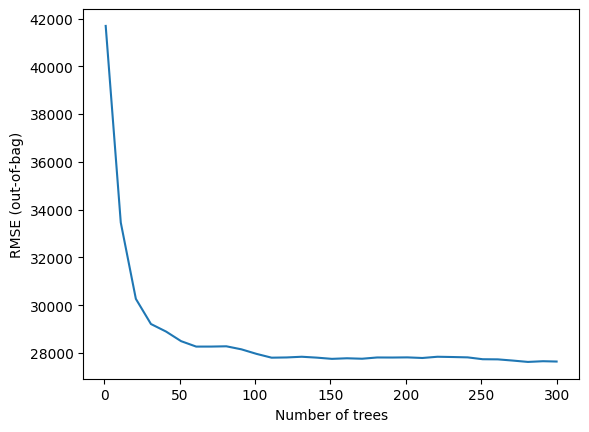

In [22]:
print("Number of tress and RMSE")
for log in logs:
    print(f"{log.num_trees}, {log.evaluation.rmse}")
    
# We can plot this numbers to see how vary the
# RMSE depending on the number of trees used
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

We can also see some general stats on the OOB dataset:

In [23]:
inspector = rf.make_inspector()
print(f"RMSE: {inspector.evaluation().rmse}")

RMSE: 27640.778001779247


Now let us run an __evaluation using the validation dataset.__

In [24]:
evaluation = rf.evaluate(x=valid_ds, return_dict=True)
print(evaluation)

1/1 [==============================] - 1s 825ms/step - loss: 0.0000e+00 - mse: 1265155456.0000
{'loss': 0.0, 'mse': 1265155456.0}


## Variable importances

Variable importances indicates how much a feature contributes to the model predictions. There are several ways to indentify important features using TensorFlow Decision Forests. Let us list the available Variable Importances for Decision Trees

In [25]:
print("Available variable importances:")
for importance in inspector.variable_importances().keys():
    print(f"\t- {importance}")

Available variable importances:
	- SUM_SCORE
	- INV_MEAN_MIN_DEPTH
	- NUM_AS_ROOT
	- NUM_NODES


As an example let us display the important features for the Variable Importance NUM_AS_ROOT. <br>
The larget the importance score for NUM_AS_ROOT, the more impact it has on the outcome of the model. <br>
By default, the list is sorted from the most important to the least. From the output you can infer that the feature at the top of the list is used as the root node in most number of trees in the random forest than any other feature.

In [26]:
inspector.variable_importances()['NUM_AS_ROOT']

[("OverallQual" (1; #62), 111.0),
 ("ExterQual" (4; #22), 64.0),
 ("Neighborhood" (4; #59), 39.0),
 ("GarageCars" (1; #32), 26.0),
 ("GrLivArea" (1; #38), 25.0),
 ("KitchenQual" (4; #44), 13.0),
 ("YearBuilt" (1; #76), 10.0),
 ("BsmtQual" (4; #14), 5.0),
 ("1stFlrSF" (1; #0), 3.0),
 ("Fireplaces" (1; #27), 1.0),
 ("FullBath" (1; #29), 1.0),
 ("GarageArea" (1; #31), 1.0),
 ("TotalBsmtSF" (1; #73), 1.0)]

Plot the variable importances from the inspector using Matplotlib

In [27]:
plt.figure(figsize=(12,4))
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]
print(variable_importances)

[("OverallQual" (1; #62), 111.0), ("ExterQual" (4; #22), 64.0), ("Neighborhood" (4; #59), 39.0), ("GarageCars" (1; #32), 26.0), ("GrLivArea" (1; #38), 25.0), ("KitchenQual" (4; #44), 13.0), ("YearBuilt" (1; #76), 10.0), ("BsmtQual" (4; #14), 5.0), ("1stFlrSF" (1; #0), 3.0), ("Fireplaces" (1; #27), 1.0), ("FullBath" (1; #29), 1.0), ("GarageArea" (1; #31), 1.0), ("TotalBsmtSF" (1; #73), 1.0)]


<Figure size 1200x400 with 0 Axes>

In [28]:
feature_names = [var[0].name for var in  variable_importances]
feature_importance = [var[1] for var in  variable_importances]
for i in range(len(feature_names)):
    print(f"{feature_names[i]} => {feature_importance[i]}")

OverallQual => 111.0
ExterQual => 64.0
Neighborhood => 39.0
GarageCars => 26.0
GrLivArea => 25.0
KitchenQual => 13.0
YearBuilt => 10.0
BsmtQual => 5.0
1stFlrSF => 3.0
Fireplaces => 1.0
FullBath => 1.0
GarageArea => 1.0
TotalBsmtSF => 1.0


111.0
Rectangle(xy=(0, -0.4), width=111, height=0.8, angle=0)
64.0
Rectangle(xy=(0, 0.6), width=64, height=0.8, angle=0)
39.0
Rectangle(xy=(0, 1.6), width=39, height=0.8, angle=0)
26.0
Rectangle(xy=(0, 2.6), width=26, height=0.8, angle=0)
25.0
Rectangle(xy=(0, 3.6), width=25, height=0.8, angle=0)
13.0
Rectangle(xy=(0, 4.6), width=13, height=0.8, angle=0)
10.0
Rectangle(xy=(0, 5.6), width=10, height=0.8, angle=0)
5.0
Rectangle(xy=(0, 6.6), width=5, height=0.8, angle=0)
3.0
Rectangle(xy=(0, 7.6), width=3, height=0.8, angle=0)
1.0
Rectangle(xy=(0, 8.6), width=1, height=0.8, angle=0)
1.0
Rectangle(xy=(0, 9.6), width=1, height=0.8, angle=0)
1.0
Rectangle(xy=(0, 10.6), width=1, height=0.8, angle=0)
1.0
Rectangle(xy=(0, 11.6), width=1, height=0.8, angle=0)


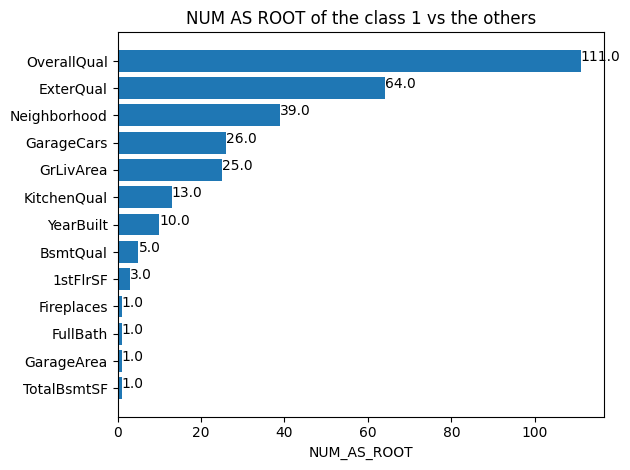

In [29]:
feature_ranks = range(len(feature_names))
bar = plt.barh(feature_ranks, feature_importance, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

for importance, patch in zip(feature_importance, bar.patches):
    print(importance)
    print(patch)
    plt.text(patch.get_x() + patch.get_width(), 
             patch.get_y(), 
             importance, 
             va = "top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

## Submission

Finally predict on the competition test data using the model.

In [30]:
test_file_path = "../input/house-prices-advanced-regression-techniques/test.csv"

test_data = pd.read_csv(test_file_path)

In [31]:
ids = test_data.pop('Id')

In [32]:
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data, 
    task = tfdf.keras.Task.REGRESSION
)

In [33]:
preds = rf.predict(test_ds)

2/2 [==============================] - 1s 24ms/step


In [34]:
output = pd.DataFrame({'Id': ids, 'SalePrice': preds.squeeze()})
output.head()

,Id,SalePrice
0,1461,125140.648438
1,1462,155231.281250
2,1463,176566.859375
3,1464,182360.062500
4,1465,195283.671875


In [35]:
sample_submission_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [36]:
sample_submission_df['SalePrice']  = rf.predict(test_ds)

2/2 [==============================] - 0s 24ms/step


In [37]:
sample_submission_df

,Id,SalePrice
0,1461,125140.648438
1,1462,155231.281250
2,1463,176566.859375
3,1464,182360.062500
4,1465,195283.671875
...,...,...
1454,2915,83418.945312
1455,2916,85242.226562
1456,2917,153882.593750
1457,2918,118924.859375


In [38]:
sample_submission_df.to_csv('/kaggle/working/submission.csv', index=False)

In [39]:
sample_submission_df.head()

,Id,SalePrice
0,1461,125140.648438
1,1462,155231.281250
2,1463,176566.859375
3,1464,182360.062500
4,1465,195283.671875
